In [1]:
import os

ttf_dir = "/home/ubuntu/ttf_aug"
file_list = [x for x in os.listdir(ttf_dir) if x.endswith(".ttf")]

In [2]:
len(file_list)

476

In [22]:
file_list

['CookieRun Regular.ttf',
 'UhBee Jisyuk jisyuk.ttf',
 'MinSans-Black.ttf',
 'UhBee YanNeu.ttf',
 'Hoengseong Hanu.ttf',
 'JSDongkang-Regular.ttf',
 'D2CodingBold-Ver132-20180524-ligature.ttf',
 'UhBee ddolyoung BOLD.ttf',
 'GamjaFlower-Regular.ttf',
 'UhBee Yiseul.ttf',
 'UhBee BEOJJI Bold.ttf',
 'MinSans-Thin.ttf',
 'CK_cm33000002.ttf',
 '나눔손글씨 또박또박.ttf',
 'SUIT-Bold.ttf',
 'SUIT-Heavy.ttf',
 'CookieRun Black.ttf',
 'UhBee Joker Bold.ttf',
 'UhBee Kang-Ja Bold.ttf',
 'UhBee Ryuga Bold.ttf',
 'NanumBarunGothicLight.ttf',
 'NanumGothicCoding-Regular.ttf',
 'UhBee UZ Bold.ttf',
 'UhBee Han HUEY Bold.ttf',
 '나눔손글씨 아름드리 꽃나무.ttf',
 'IBMPlexSansKR-Regular.ttf',
 'CK_ctr0029.ttf',
 'UhBee Han HUEY.ttf',
 'GothicA1-ExtraLight.ttf',
 '충북대직지체 설치파일.ttf',
 'Dongle-Regular.ttf',
 'UhBee ibuson.ttf',
 'NanumSquare_acR.ttf',
 'UhBee ann Bold.ttf',
 'UhBee Banynany Bold.ttf',
 'Dongle-Light.ttf',
 '12롯데마트행복Bold.ttf',
 '나눔손글씨 아줌마 자유.ttf',
 'UhBee Gmin2 Bold.ttf',
 'UhBee YanNeu Bold.ttf',
 'UhBee QUEE

In [4]:
from PIL import ImageFont, ImageDraw, Image

In [5]:
kor_characters = [
    '값',
    '같',
    '곬',
    '곶',
    '깎',
    '넋',
    '늪',
    '닫',
    '닭',
    '닻',
    '됩',
    '뗌',
    '략',
    '몃',
    '밟',
    '볘',
    '뺐',
    '뽈',
    '솩',
    '쐐',
    '앉',
    '않',
    '얘',
    '얾',
    '엌',
    '옳',
    '읊',
    '죡',
    '쮜',
    '춰',
    '츄',
    '퀭',
    '틔',
    '핀',
    '핥',
    '후'
]

In [6]:
len(kor_characters)

36

In [9]:
data_root = "../data_new"
if not os.path.isdir(data_root):
    os.mkdir(data_root)

data_set_name = "explor_all"
data_path = data_root + os.path.sep + data_set_name
if not os.path.isdir(data_path):
    os.mkdir(data_path)

img_path = data_path + os.path.sep + "image"
if not os.path.isdir(img_path):
    os.mkdir(img_path)

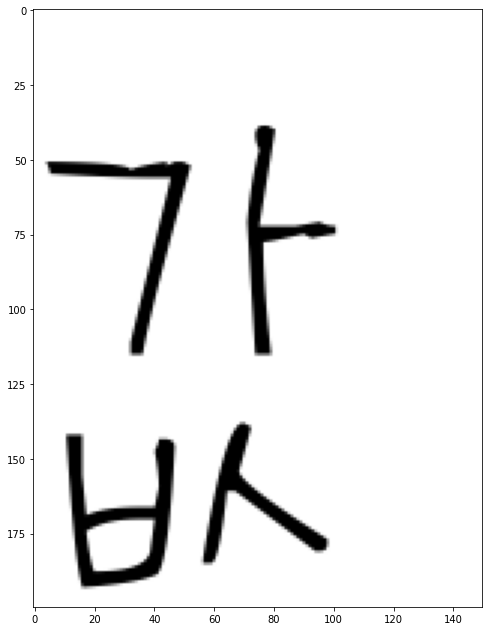

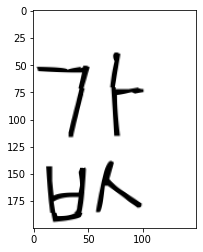

In [17]:
W, H = (150, 200)
# 흰색 배경
image = Image.new('RGB', (W, H), (255, 255, 255))
# 폰트 설정
font_size = 150
font = ImageFont.truetype(ttf_dir + os.path.sep + "UhBee YanNeu.ttf", font_size)
# 이미지 생성
draw = ImageDraw.Draw(image)
# 글자 크기
w, h = draw.textsize("다", font=font)
# 배경 중간에 글자 배치
draw.text((0, 0), "값", fill="black", font=font)
plt.figure(figsize=(11, 11))
plt.imshow(image)
plt.show()
plt.imshow(image.rotate(1, fillcolor="white"))
plt.show()

In [18]:
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

f = open(data_path + os.path.sep + "attributes.txt", "r")
line_num = 1
line = f.readline()
labeled = set()
while line:
    if line_num != 1:
        labeled.add(line.split("/")[0])
    line = f.readline()
    line_num += 1
f.close()

In [19]:
print(len(labeled))

# attributes 파일 생성
f = open(data_path + os.path.sep + "attributes.txt", "a+")
# fot att2font
for file_name in file_list:
    try:
        temp_path = img_path + os.path.sep + Path(file_name).stem.replace(" ", "")
        if not os.path.isdir(temp_path):
            os.mkdir(temp_path)
        # unsuper attributes
        attributes = "  ".join(["1.0" for x in range(10)])
        current_font_name = Path(file_name).stem.replace(" ", "")
        if current_font_name in labeled:
            # 이전에 라벨링 했으니 이미지 파일만 만듦 / aug는 1로 고정
            # 파일명 이어써져서 대충 3번 나누기
            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                image.save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + os.path.sep + idx +".png")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                 # augmented (rotation)
                aug_path = temp_path + "_rotated"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                # augmented (rotation -1)
                aug_path = temp_path + "_rotated_m1"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(-1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated_m1"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        
        else:
            # 1로 픽스하고 이미지 파일 만듦 / aug도 같이 만듦
            for i, character in enumerate(kor_characters):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)

                # orifinal
                image.save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + os.path.sep + idx +".png")
                f.write(Path(file_name).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)

                # augmented (rotation 1)
                aug_path = temp_path + "_rotated"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                # augmented (rotation -1)
                aug_path = temp_path + "_rotated_m1"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(-1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated_m1"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        
    except:
        print(file_name)
            
            

# 나머지는 augmentation으로 채우기


f.close()

# for dmfont

# todo

248


36it [00:00, 149.07it/s]
36it [00:00, 151.45it/s]
36it [00:00, 160.83it/s]
36it [00:00, 154.18it/s]
36it [00:00, 152.76it/s]
36it [00:00, 83.47it/s]
36it [00:00, 83.34it/s]
36it [00:00, 168.02it/s]
36it [00:00, 166.13it/s]
36it [00:00, 162.61it/s]
36it [00:00, 151.46it/s]
36it [00:00, 152.48it/s]
36it [00:00, 160.50it/s]
36it [00:00, 158.13it/s]
36it [00:00, 94.12it/s]
36it [00:00, 94.32it/s]
36it [00:00, 183.10it/s]
36it [00:00, 183.55it/s]
36it [00:00, 183.51it/s]
36it [00:00, 160.98it/s]
36it [00:00, 158.75it/s]
36it [00:00, 203.07it/s]
36it [00:00, 192.84it/s]
36it [00:00, 193.53it/s]
36it [00:00, 178.75it/s]
36it [00:00, 167.89it/s]
36it [00:00, 170.13it/s]
36it [00:00, 92.08it/s]
36it [00:00, 90.81it/s]
36it [00:00, 144.88it/s]
36it [00:00, 139.43it/s]
36it [00:00, 193.13it/s]
36it [00:00, 183.65it/s]
36it [00:00, 184.40it/s]
36it [00:00, 126.91it/s]
36it [00:00, 125.82it/s]
36it [00:00, 120.69it/s]
36it [00:00, 122.42it/s]
36it [00:00, 147.01it/s]
36it [00:00, 146.84it/s]
36it [

나눔손글씨 하나손글씨.ttf


36it [00:00, 141.21it/s]
36it [00:00, 140.97it/s]
36it [00:00, 193.63it/s]
36it [00:00, 185.18it/s]
36it [00:00, 179.30it/s]
36it [00:00, 152.07it/s]
36it [00:00, 153.89it/s]
36it [00:00, 189.32it/s]
36it [00:00, 180.69it/s]
36it [00:00, 181.78it/s]
36it [00:00, 186.97it/s]
36it [00:00, 179.52it/s]
36it [00:00, 167.64it/s]
36it [00:00, 201.32it/s]
36it [00:00, 191.14it/s]
36it [00:00, 194.17it/s]
36it [00:00, 149.00it/s]
36it [00:00, 148.00it/s]
36it [00:00, 177.25it/s]
36it [00:00, 171.12it/s]
36it [00:00, 169.42it/s]
36it [00:00, 171.44it/s]
36it [00:00, 160.76it/s]
36it [00:00, 163.12it/s]
36it [00:00, 176.14it/s]
36it [00:00, 170.00it/s]
36it [00:00, 160.66it/s]
36it [00:00, 153.48it/s]
36it [00:00, 152.14it/s]
36it [00:00, 117.71it/s]
36it [00:00, 118.21it/s]
36it [00:00, 134.81it/s]
36it [00:00, 135.30it/s]
36it [00:00, 190.63it/s]
36it [00:00, 181.40it/s]
36it [00:00, 178.64it/s]
36it [00:00, 141.66it/s]
36it [00:00, 143.01it/s]
36it [00:00, 114.68it/s]
36it [00:00, 114.27it/s]


나눔손글씨 동화또박.ttf


36it [00:00, 195.09it/s]
36it [00:00, 180.47it/s]
36it [00:00, 185.83it/s]
36it [00:00, 160.64it/s]
36it [00:00, 154.28it/s]
36it [00:00, 185.74it/s]
36it [00:00, 176.36it/s]
36it [00:00, 177.61it/s]
36it [00:00, 237.71it/s]
36it [00:00, 222.09it/s]
36it [00:00, 221.85it/s]
36it [00:00, 86.78it/s]
36it [00:00, 86.93it/s]
36it [00:00, 97.29it/s]
36it [00:00, 98.72it/s]
36it [00:00, 188.49it/s]
36it [00:00, 179.19it/s]
36it [00:00, 178.84it/s]
36it [00:00, 206.24it/s]
36it [00:00, 192.14it/s]
36it [00:00, 194.47it/s]
36it [00:00, 131.71it/s]
36it [00:00, 132.04it/s]
36it [00:00, 179.67it/s]
36it [00:00, 171.31it/s]
36it [00:00, 169.98it/s]
36it [00:00, 95.54it/s]
36it [00:00, 93.16it/s]
36it [00:00, 62.97it/s]
36it [00:00, 63.96it/s]
36it [00:00, 63.73it/s]
36it [00:00, 64.00it/s]
36it [00:00, 177.40it/s]
36it [00:00, 168.01it/s]
36it [00:00, 168.84it/s]
36it [00:00, 168.68it/s]
36it [00:00, 161.78it/s]
36it [00:00, 162.74it/s]
36it [00:00, 160.46it/s]
36it [00:00, 160.53it/s]
36it [00:0

In [20]:
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

f = open(data_path + os.path.sep + "attributes.txt", "r")
line_num = 1
line = f.readline()
labeled = list()
while line:
    if line_num != 1:
        labeled.append(line.split("/")[0])
    line = f.readline()
    line_num += 1
f.close()

test = set(labeled)
print(len(test))
print(len(labeled) /36)


    


1427
1427.0


In [21]:
from collections import Counter
result = Counter(labeled)
print(result)

Counter({'UhBeeJisyukjisyuk': 36, 'UhBeeYanNeu': 36, 'UhBeeddolyoungBOLD': 36, 'UhBeeYiseul': 36, 'UhBeeBEOJJIBold': 36, '나눔손글씨또박또박': 36, 'UhBeeJokerBold': 36, 'UhBeeKang-JaBold': 36, 'UhBeeRyugaBold': 36, 'UhBeeUZBold': 36, 'UhBeeHanHUEYBold': 36, '나눔손글씨아름드리꽃나무': 36, 'UhBeeHanHUEY': 36, 'UhBeeibuson': 36, 'UhBeeannBold': 36, 'UhBeeBanynanyBold': 36, '나눔손글씨아줌마자유': 36, 'UhBeeGmin2Bold': 36, 'UhBeeYanNeuBold': 36, 'UhBeeQUEENJ': 36, 'BMDOHYEON_ttf': 36, '나눔손글씨부장님눈치체': 36, 'UhBeeMardyuBold': 36, 'UhBeecharming': 36, '나눔손글씨마고체': 36, '나눔손글씨백의의천사': 36, 'UhBeeJisyukjisyukBOLD': 36, '나눔손글씨한윤체': 36, 'UhBeeWyumBold': 36, 'UhbeeNaHyunBold': 36, '나눔손글씨연지체': 36, '나눔손글씨북극성': 36, '나눔손글씨엄마사랑': 36, '나눔손글씨하람체': 36, '나눔손글씨열아홉의반짝임': 36, 'UhBeeyulBold': 36, '나눔손글씨다채사랑': 36, '나눔손글씨아빠의연애편지': 36, 'BMKIRANGHAERANG-TTF': 36, '나눔손글씨배은혜체': 36, 'UhBeeyoongdi': 36, '나눔손글씨희망누리': 36, 'BMHANNAPro': 36, 'UhBeeStrawberryBOLD': 36, '나눔손글씨무진장체': 36, '나눔손글씨다진체': 36, '나눔손글씨고딕아니고고딩': 36, '나눔손글씨가람연꽃': 36, 'UhBeeDoolDoolBold':